In [ ]:
### I/O SimpleITK

# import SimpleITK as sitk
# avmlabel = sitk.ReadImage("Data\AVL-LR-Final-Case53\S-Final-1-label.nrrd")
# vnda = sitk.GetArrayFromImage(lungim)
# fvess = sitk.GetImageFromArray(vnds)

In [1]:
import numpy as np
import nrrd  # pip install pynrrd
from skimage.morphology import skeletonize_3d  # pip install scikit-image
import networkx as nx

In [2]:
# Load/create the 3D mask

avmlabel, metadata = nrrd.read("z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-83-Spiromics-51198519/MarkUps/88-Jensen/S-Final-2-label.nrrd")

atree = np.zeros_like(avmlabel)
atree[avmlabel == 1] = 1

In [3]:
# Create and save the skeleton

skeleton = skeletonize_3d(atree.astype(np.uint8))
nrrd.write("z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-83-Spiromics-51198519/MarkUps/88-Jensen/S-Final-2-label(SKELETON).nrrd", skeleton)

# np.shape(np.nonzero(skeleton)) # (3, 9862)
# np.nonzero(skeleton)
# indices = np.transpose(np.nonzero(skeleton))
# np.transpose(np.nonzero(skeleton))

In [4]:
np.transpose(np.nonzero(skeleton))

array([[ 92, 324, 164],
       [ 93, 325, 164],
       [ 94, 326, 164],
       ...,
       [851, 392, 114],
       [852, 391, 113],
       [853, 390, 113]], dtype=int64)

In [5]:
skeleton, _ = nrrd.read("z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-83-Spiromics-51198519/MarkUps/88-Jensen/S-Final-2-label(SKELETON).nrrd")

In [6]:
### Old: Create Graph/Neighbours/...

# np.shape(avmlabel)
# skeleton[45:52,263:270,198:204]

import networkx as nx

# Convert skeleton to graph
graph = nx.Graph()
indices = np.transpose(np.nonzero(skeleton))
graph.add_nodes_from(map(tuple, indices[0:20]))

# # Add edges to the graph
# for index in indices:
#     neighbors = np.array(list(nx.generate_adjlist(graph, [tuple(index)])))[0].astype(int)
#     for neighbor in neighbors:
#         graph.add_edge(tuple(index), tuple(np.array(list(map(int, neighbor.split(','))))))

# # Simplify the graph (remove intermediate nodes and consolidate segments)
# simplified_graph = graph.copy()
# # ... You need to implement the simplification process based on your criteria.


In [7]:
# Function: Print Nodes/Edges/...

def print_stats(graph):
    num_nodes = nx.number_of_nodes(graph)
    num_edges = nx.number_of_edges(graph)
    all_nodes = list(graph.nodes)
    all_edges = list(graph.edges)

    print("Number of Nodes:", num_nodes)
    print("Number of Edges:", num_edges)
    print("All Nodes:", all_nodes)
    print("All Edges:", all_edges)
    return

In [ ]:
### 2D Spring Plot

import matplotlib.pyplot as plt

# Draw the graph using a spring layout (for undirected graphs)
plt.figure(figsize=(10, 4))
pos = nx.spring_layout(graph) # , seed=43
nx.draw(graph, pos, node_size=8, node_color="skyblue"edge_color="gray")
# with_labels=True, font_size=8, font_color="black"
plt.title("Vessel Tree Graph")
plt.show()

In [ ]:
### Later:
# Approach-1: Make Interactive 3D Plot

from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Get node positions from the graph (assuming you have the coordinates in the nodes' attributes)
node_positions = {node: graph.nodes[node]['pos'] for node in graph.nodes}

# Draw nodes
for node, pos in node_positions.items():
    ax.scatter(pos[0], pos[1], pos[2], color='skyblue', s=100, label=node)

# Draw edges
for edge in graph.edges:
    pos1 = node_positions[edge[0]]
    pos2 = node_positions[edge[1]]
    ax.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], [pos1[2], pos2[2]], color='gray')

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add legend
ax.legend()

# Show the interactive 3D plot
plt.show()

In [8]:
# Create graph/edges/neighbours/...

import numpy as np
from skimage.morphology import skeletonize_3d
import networkx as nx
import plotly.graph_objects as go  # pip install plotly
from plotly.subplots import make_subplots

# Step 2: Convert skeletonized image to a graph representation
graph = nx.Graph()
indices = np.array(np.where(skeleton))
num_points = indices.shape[1]
for i in range(num_points): # 20,100 # num_points
    point = tuple(indices[:, i])
    neighbors = []
    for offset in np.ndindex((3, 3, 3)):
        neighbor = tuple(indices[:, i] + np.array(offset) - 1)
        if neighbor != point and neighbor in graph:
            neighbors.append(neighbor)
    graph.add_node(point)
    graph.add_edges_from((point, n) for n in neighbors)

In [9]:
print_stats(graph)

Number of Nodes: 12048
Number of Edges: 12304
All Nodes: [(92, 324, 164), (93, 325, 164), (94, 326, 164), (95, 327, 164), (96, 328, 164), (97, 300, 134), (97, 328, 164), (98, 301, 135), (98, 329, 164), (99, 301, 135), (99, 329, 164), (100, 302, 136), (100, 330, 164), (101, 303, 137), (101, 331, 165), (102, 303, 138), (102, 331, 165), (103, 304, 139), (103, 332, 165), (103, 363, 234), (104, 304, 139), (104, 333, 165), (104, 363, 235), (105, 305, 140), (105, 333, 166), (105, 363, 235), (106, 306, 141), (106, 334, 166), (106, 363, 236), (107, 306, 141), (107, 335, 166), (107, 363, 236), (108, 307, 142), (108, 335, 167), (108, 363, 237), (109, 307, 143), (109, 335, 167), (109, 347, 163), (109, 363, 237), (110, 308, 144), (110, 336, 167), (110, 346, 164), (110, 364, 237), (111, 309, 145), (111, 337, 167), (111, 346, 164), (111, 364, 238), (112, 309, 145), (112, 338, 167), (112, 345, 165), (112, 364, 238), (113, 310, 146), (113, 339, 167), (113, 344, 166), (113, 365, 239), (114, 310, 147), (

In [10]:
### Remove all leafs?!!!!! x

# Step 3: Simplify the graph by removing intermediate nodes that lie on a single branch

leaf_nodes = [node for node, degree in graph.degree if degree == 1]

while len(leaf_nodes) > 1:
    graph.remove_nodes_from(leaf_nodes)
    leaf_nodes = [node for node, degree in graph.degree if degree == 1]

In [11]:
print_stats(graph)

Number of Nodes: 3736
Number of Edges: 3992
All Nodes: [(115, 341, 167), (115, 342, 167), (116, 342, 167), (117, 342, 168), (118, 342, 168), (119, 342, 169), (120, 342, 169), (121, 342, 170), (122, 341, 170), (123, 341, 171), (124, 340, 171), (125, 340, 171), (126, 340, 172), (127, 340, 172), (128, 340, 172), (129, 339, 172), (130, 339, 173), (131, 339, 173), (132, 339, 173), (133, 339, 174), (134, 339, 174), (135, 338, 175), (136, 338, 175), (137, 338, 176), (138, 338, 176), (139, 338, 176), (140, 338, 177), (141, 338, 177), (142, 338, 177), (143, 338, 177), (144, 338, 178), (145, 338, 178), (146, 338, 178), (147, 336, 177), (147, 337, 178), (148, 337, 178), (149, 337, 179), (150, 337, 179), (151, 337, 180), (152, 337, 180), (153, 337, 181), (154, 337, 181), (155, 337, 182), (156, 337, 182), (157, 337, 183), (158, 338, 183), (159, 338, 184), (160, 338, 184), (161, 339, 184), (162, 336, 168), (162, 336, 169), (162, 339, 185), (163, 335, 169), (163, 337, 170), (163, 339, 185), (164, 336

In [12]:
# Remove degree-2 nodes*

while True:
    # Find nodes with degree 2
    degree_two_nodes = [node for node, degree in graph.degree if degree == 2]
    
    # If there are no intermediate nodes to remove, break the loop
    if not degree_two_nodes:
        break
    # Remove the intermediate nodes
    for node in degree_two_nodes:
        neighbors = list(graph.neighbors(node))
        if len(neighbors) == 2:
            graph.add_edge(neighbors[0], neighbors[1])
        graph.remove_node(node)
        
# [node for node in graph if node[0] == 213 and node[1] == 229]

In [13]:
print_stats(graph)

Number of Nodes: 165
Number of Edges: 357
All Nodes: [(116, 342, 167), (162, 336, 169), (166, 339, 185), (167, 339, 184), (167, 339, 185), (185, 389, 239), (191, 406, 268), (207, 281, 392), (212, 390, 256), (223, 268, 251), (229, 296, 293), (248, 192, 356), (248, 404, 221), (252, 266, 452), (262, 314, 292), (271, 369, 258), (273, 430, 431), (278, 423, 316), (292, 400, 262), (297, 366, 270), (297, 372, 277), (297, 373, 277), (298, 372, 278), (298, 392, 270), (301, 504, 139), (305, 238, 412), (308, 358, 252), (311, 318, 397), (311, 319, 396), (312, 319, 396), (314, 454, 438), (316, 347, 309), (317, 345, 310), (317, 346, 310), (318, 345, 310), (319, 334, 470), (320, 291, 388), (320, 291, 389), (320, 391, 413), (321, 292, 388), (322, 330, 310), (324, 338, 313), (324, 339, 313), (325, 339, 314), (329, 434, 259), (330, 317, 392), (344, 355, 406), (361, 342, 390), (408, 335, 352), (408, 335, 353), (409, 335, 352), (567, 365, 369), (568, 365, 368), (568, 365, 369), (573, 364, 377), (573, 364, 

In [14]:
# Create edge 'edge_length' property

for edge in graph.edges:
    node1, node2 = edge
    x1, y1, z1 = node1
    x2, y2, z2 = node2
    edge_length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    graph.edges[edge]['edge_length'] = edge_length

In [ ]:
# for indx, edge in enumerate(graph.edges):
#     print(graph.edges[edge])
#     if indx==0: break

# for indx, node in enumerate(graph.nodes):
#     print(graph.nodes[node])
#     if indx==0: break

In [17]:

def plot_3D(graph):
    fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])
    x, y, z = zip(*graph.nodes)
    
    leaf_nodes = [node for node, degree in graph.degree if degree == 1]
    
    node_trace = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=2,
            color=['red' if node in leaf_nodes else 'blue' for node in graph.nodes()],
            opacity=0.8
        )
    )
    fig.add_trace(node_trace)

    for edge in graph.edges():
        x0, y0, z0 = edge[0]
        x1, y1, z1 = edge[1]
        
        edge_length = graph.edges[edge]['edge_length']
        edge_text = f'{edge_length:.2f}'  # Display the edge length as text
        
        edge_trace = go.Scatter3d(
            x=[x0, x1],
            y=[y0, y1],
            z=[z0, z1],
            mode='lines',
            line=dict(color='orange' if graph.edges[edge]['edge_length'] < 20 else 'gray',
                      width=3),
            hoverinfo='text',
            text=edge_text
        )
        fig.add_trace(edge_trace)

    fig.update_layout(  
        scene=dict(
        # Set background color to transparent or any color you prefer
        bgcolor='rgba(0,0,0,0)',
        
        # Hide axes
        xaxis=dict(showbackground=False, showgrid=False, zeroline=False, showline=False),
        yaxis=dict(showbackground=False, showgrid=False, zeroline=False, showline=False),
        zaxis=dict(showbackground=False, showgrid=False, zeroline=False, showline=False)
        )
    )
    
    fig.update_layout(
        margin=dict(l=0, r=0, b=0, t=0),
        scene=dict(
            xaxis=dict(range=[0, max(x) + 1]),
            yaxis=dict(range=[0, max(y) + 1]),
            zaxis=dict(range=[0, max(z) + 1])
        )
    )

    fig.show()
    return

In [18]:
import time
StartTime = time.time()
print('Plotting the 3D Graph ..')
plot_3D(graph)
print(f'Elapsed: {time.time()-StartTime:5.2f}')

Plotting the 3D Graph ..


Elapsed:  0.40


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nrrd

# Load the .nrrd file
nrrd_file_path = graph
skeleton_data = nrrd_file_path

# Get the coordinates from the skeleton data
x, y, z = np.where(skeleton_data)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='*', s=.5, alpha = .1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Skeleton Points')

plt.show()


ValueError: not enough values to unpack (expected 3, got 2)

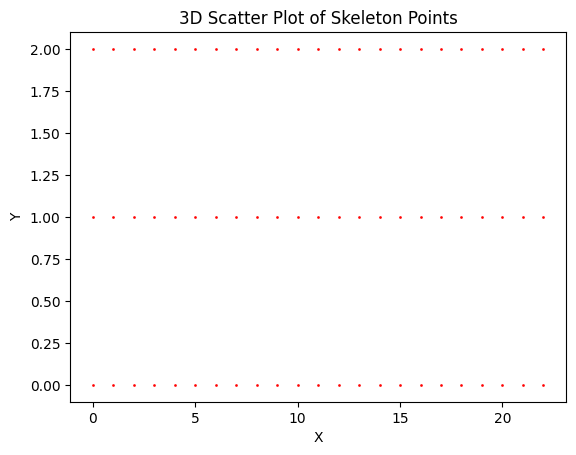

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nrrd

# Load the .nrrd file

skeleton_data = graph
# Get the coordinates from the skeleton data
x, y, = np.where(skeleton_data)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, c='r', marker='o', s=1, alpha = .9)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('3D Scatter Plot of Skeleton Points')

plt.show()


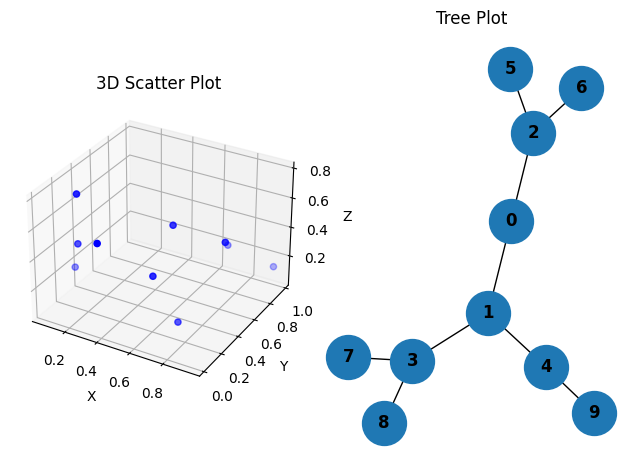

In [41]:
## TO LEARN HOW TO WORK WITH THESE GRAPHS

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

# Generate fictional 3D data with 10 points
np.random.seed(42)
n_points = 10
x = np.random.rand(n_points)
y = np.random.rand(n_points)
z = np.random.rand(n_points)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')

# Create a fictional tree structure

tree = nx.Graph(edges)

# Create a tree plot
ax2 = fig.add_subplot(122)
pos = nx.spring_layout(tree)
nx.draw(tree, pos, with_labels=True, font_weight='bold', node_size=1000, ax=ax2)
ax2.set_title('Tree Plot')

plt.tight_layout()
plt.show()


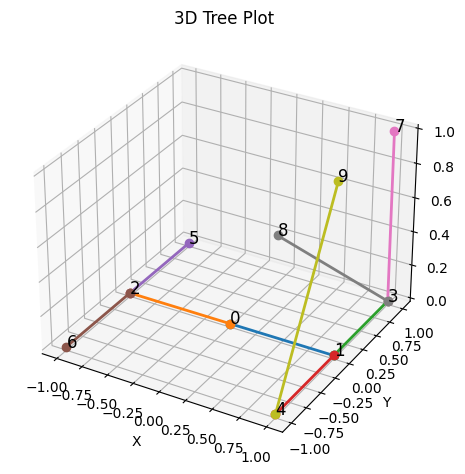

: 

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

# Create a fictional 3D tree structure
edges = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9)]
tree = nx.Graph(edges)

# Create a 3D tree plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define 3D positions for the nodes
pos = {
    0: (0, 0, 0),
    1: (1, 0, 0),
    2: (-1, 0, 0),
    3: (1, 1, 0),
    4: (1, -1, 0),
    5: (-1, 1, 0),
    6: (-1, -1, 0),
    7: (1, 1, 1),
    8: (1, -1, 1),
    9: (1, 0, 1)
}

# Draw nodes and edges in 3D space
for edge in tree.edges():
    ax.plot(*zip(*[pos[node] for node in edge]), marker='o', markersize=6, linewidth=2)

# Set labels for nodes
for node, (x, y, z) in pos.items():
    ax.text(x, y, z, str(node), fontsize=12, color='black')

ax.set_title('3D Tree Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.tight_layout()
plt.show()


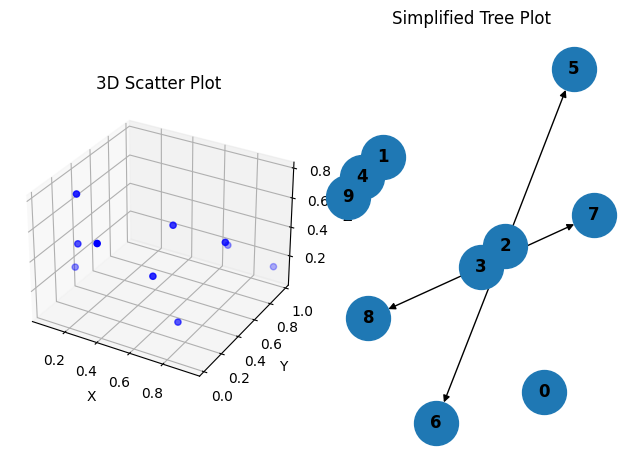

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

# Generate fictional 3D data with 10 points
np.random.seed(42)
n_points = 10
x = np.random.rand(n_points)
y = np.random.rand(n_points)
z = np.random.rand(n_points)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')

# Create a fictional tree structure
edges = [(0, 1), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9)]
tree = nx.DiGraph(edges)  # Use a directed graph to represent a tree

# Remove intermediate nodes
non_leaf_nodes = [node for node in tree.nodes() if tree.out_degree(node) > 1]
for node in non_leaf_nodes:
    children = list(tree.successors(node))
    parent = list(tree.predecessors(children[0]))[0]  # Use the first child's parent
    tree.remove_node(node)
    for child in children:
        tree.add_edge(parent, child)

# Create a tree plot
ax2 = fig.add_subplot(122)
pos = nx.spring_layout(tree)
nx.draw(tree, pos, with_labels=True, font_weight='bold', node_size=1000, ax=ax2)
ax2.set_title('Simplified Tree Plot')

plt.tight_layout()
plt.show()


In [33]:
scatter = plot_3D(graph)


TypeError: '<' not supported between instances of 'dict' and 'int'

In [10]:
import time
StartTime = time.time()
print('Plotting the 3D Graph ..')
plot_3D(graph)
print(f'Elapsed: {time.time()-StartTime:5.2f}')

Plotting the 3D Graph ..


Elapsed:  2.62


In [ ]:
# list(graph.nodes).index((404, 136, 313))
# list(graph.nodes)[0]

In [ ]:
# indices2 = np.array(np.where(skeleton))
# indices2[:, 0]
# tuple(indices2[:, 0])
# list(graph.nodes).index((49, 268, 201))
# dict(graph.nodes)#[(49, 268, 201)]
# list(graph.nodes)[272]

In [ ]:
### Doesn't work for undirected graphs!

cycles = list(nx.simple_cycles(graph))
print("Cycles found:")
for cycle in cycles:
    print(cycle)

In [ ]:
### Bad code: Finds only 2-tuples of cycles, and oblivious of root, and maxcyclesize=3

# graph.size()

def find_cycles(graph):
    visited = set()
    cycles = []

    def dfs(node, parent):
        visited.add(node)
        for neighbor in graph.neighbors(node):
            if neighbor == parent:
                continue
            if neighbor in visited:
                cycles.append([neighbor, node])
            else:
                dfs(neighbor, node)

    for node in graph.nodes():
        if node not in visited:
            dfs(node, None)

    return cycles

cycles = find_cycles(graph)
print("Cycles found:")
for cycle in cycles:
    print(cycle)

In [ ]:
def find_cycles(graph, root_node):
    cycles = []

    def dfs(node, visited, path):
        visited.add(node)
        path.append(node)

        if len(path) >= 2 and path[0] in graph.neighbors(node):
            cycles.append(path[:3])  # Only consider cycles up to length 3

        if len(path) < 3:
            for neighbor in graph.neighbors(node):
                if neighbor not in visited and neighbor != root_node:
                    dfs(neighbor, visited.copy(), path.copy())

    dfs(root_node, set(), [])

    return cycles

# Assuming you already have an undirected graph named 'graph' and a known root node 'root_node'
cycles = find_cycles(graph, list(graph.nodes)[271])
print("Cycles found:")
for cycle in cycles:
    print(cycle)

In [ ]:
# Adjacency-2-Graph

# Given adjacency matrix as a dictionary
adjacency_dict = {
    1: [2, 3],
    2: [1, 4, 3],
    3: [1, 5, 2],
    4: [2],
    5: [3]
}

# Create a graph
G = nx.Graph()

# Add nodes and edges based on the adjacency dictionary
for node, neighbors in adjacency_dict.items():
    G.add_node(node)
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Print the edges of the created graph
print("Edges of the graph:")
for edge in G.edges():
    print(edge)

In [ ]:
# Cycle-3: Good-Approach-8! Using adjacency matrix and without netwrokx: Creates 10 duplicates!

def find_length_3_cycles(graph, node, visited, parent=None, depth=0):
    visited[node] = True

    for neighbor in graph[node]:
        if not visited[neighbor]:
            find_length_3_cycles(graph, neighbor, visited, node, depth + 1)
        elif depth >= 2 and neighbor != parent:
            print("Length-3 cycle:", node, "->", neighbor, "->", parent)

    visited[node] = False

# Assuming your graph is represented as an adjacency list
graph = {
    1: [2, 3],
    2: [1, 4, 3],
    3: [1, 5, 2],
    4: [2],
    5: [3]
}

visited = {node: False for node in graph}
for node in graph:
    find_length_3_cycles(graph, node, visited)


In [ ]:
### Cycle-3: Approach-9! Bare-basic checking. Works great. Has 3! duplicates.

# Find all length-3 cycles
length_3_cycles = []
for node in G.nodes():
    neighbors = list(G.neighbors(node))
    for neighbor1 in neighbors:
        for neighbor2 in neighbors:
            if neighbor1 != neighbor2 and G.has_edge(neighbor1, neighbor2):
                length_3_cycles.append([node, neighbor1, neighbor2])

# Print the length-3 cycles
for cycle in length_3_cycles:
    print(cycle)

In [ ]:
# Approach-9 with duplicates removed

# Find all length-3 cycles without duplicates
length_3_cycles = set()
for node in graph.nodes():
    neighbors = list(graph.neighbors(node))
    for neighbor1 in neighbors:
        for neighbor2 in neighbors:
            if neighbor1 != neighbor2 and graph.has_edge(neighbor1, neighbor2):
                cycle = tuple(sorted([node, neighbor1, neighbor2]))  # Sorting to avoid permutations
                length_3_cycles.add(cycle)

# Convert the cycles back to lists for printing
length_3_cycles = [list(cycle) for cycle in length_3_cycles]

# Print the length-3 cycles without duplicates
for cycle in length_3_cycles:
    print(cycle)

In [ ]:
EdgesInCycles = [[L[i], L[(i+1)%3]] for L in length_3_cycles for i in [0, 1, 2]]
EdgesInCycles

In [ ]:
graph.edges[EdgesInCycles[2]]

In [ ]:
# 6 % 3
# 2+1 % 3 = 3!

In [ ]:
### Experiments

# KTHCYCLE_NODES = length_3_cycles[0]
# KTHCYCLE_NODES
# # list(graph.edges)[0] in length_3_cycles
# # length_3_cycles[0]
# ITHEDGE_NODES = list(list(graph.edges)[0])
# ITHEDGE_NODES
# EdgeIsInCycle = all(item in KTHCYCLE_NODES for item in ITHEDGE_NODES)
# EdgeIsInCycle

In [ ]:
# Plot Interactive 3D-2!

fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])
x, y, z = zip(*graph.nodes)

leaf_nodes = [node for node, degree in graph.degree if degree == 1]

node_trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        color=['red' if node in leaf_nodes else 'blue' for node in graph.nodes()],
        opacity=0.4 #0.8
    )
)
fig.add_trace(node_trace)

for edge in graph.edges():
    x0, y0, z0 = edge[0]
    x1, y1, z1 = edge[1]
    
    edge_length = graph.edges[edge]['edge_length']
    edge_text = f'{edge_length:.2f}'  # Display the edge length as text
    
    edge_is_in_a_cycle = [edge[0],edge[1]] in EdgesInCycles or [edge[1],edge[0]] in EdgesInCycles
    
    edge_trace = go.Scatter3d(
        x=[x0, x1],
        y=[y0, y1],
        z=[z0, z1],
        mode='lines',
        line=dict(color='rgba(255, 0, 0, 0.8)' if edge_is_in_a_cycle else 'rgba(128, 128, 128, 0.4)',
            width=3),
        hoverinfo='text',
        text=edge_text
    )
    fig.add_trace(edge_trace)

fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(range=[0, max(x) + 1]),
        yaxis=dict(range=[0, max(y) + 1]),
        zaxis=dict(range=[0, max(z) + 1])
    )
)

fig.show()  

In [ ]:
# set([1,2]) == set([2,1])
set([1,2]) in set([1,2,3])

![Alt text](image.png)

In [ ]:
# True networkx adjacency matrix

# Get the adjacency matrix
adj_matrix = nx.adjacency_matrix(G)

# Convert the sparse matrix to a dense NumPy array
adj_matrix_dense = adj_matrix.toarray()

# Print the adjacency matrix
print(adj_matrix_dense)

In [12]:
from mayavi import mlab
import numpy as np

# Create a figure
mlab.figure()

# Create a meshgrid for your 3D object
x, y, z = np.where(skeleton == 1)

# Plot the 3D object as a surface
mlab.points3d(x, y, z, scale_factor=1, color=(0, 0, 1), mode='cube')

mlab.show()

In [18]:
import numpy as np
import nrrd
from mayavi import mlab

class SkeletonVisualizer:
    def __init__(self, skeleton_data):
        self.skeleton_data = skeleton_data

    def visualize(self):
        skeleton_indices = np.transpose(np.nonzero(self.skeleton_data))
        x, y, z = skeleton_indices[:, 0], skeleton_indices[:, 1], skeleton_indices[:, 2]

        fig = mlab.figure(bgcolor=(1, 1, 1))
        scatter = mlab.points3d(x, y, z, scale_factor=1, color=(1, 0, 0))
        mlab.show()

if __name__ == "__main__":
    # Replace this with the path to your skeleton .nrrd file
    nrrd_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-47-0.5_QR40_RESEARCH_A_80KV_Qr40d_3_65177004/Markups/88-Nathan/E-Skeleton-1.nrrd"

    # Load .nrrd file using pynrrd
    skeleton_data, header = nrrd.read(nrrd_path)

    visualizer = SkeletonVisualizer(skeleton_data)
    visualizer.visualize()


In [ ]:
"z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-47-0.5_QR40_RESEARCH_A_80KV_Qr40d_3_65177004/Markups/88-Nathan/E-Skeleton-1.nrrd"

In [7]:
import numpy as np
import nrrd
from mayavi import mlab

class SkeletonVisualizer:
    def __init__(self, skeleton_data):
        self.skeleton_data = skeleton_data

    def visualize(self):
        skeleton_indices = np.transpose(np.nonzero(self.skeleton_data))
        x, y, z = skeleton_indices[:, 0], skeleton_indices[:, 1], skeleton_indices[:, 2]

        fig = mlab.figure(bgcolor=(0, 0, 0))
        
        # Create scatter plot for skeleton points
        scatter = mlab.points3d(x, y, z, scale_factor=1, color=(1, 0, 0))
        
        # Add labeled orientation axes
        orientation_axes = mlab.orientation_axes()
        
        mlab.show()

if __name__ == "__main__":
    # Replace this with the path to your skeleton .nrrd file
    nrrd_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-47-0.5_QR40_RESEARCH_A_80KV_Qr40d_3_65177004/Markups/88-Nathan/E-Skeleton-1.nrrd"

    # Load .nrrd file using nrrd library
    skeleton_data, header = nrrd.read(nrrd_path)

    visualizer = SkeletonVisualizer(skeleton_data)
    visualizer.visualize()


In [19]:
import numpy as np
import nrrd
from mayavi import mlab

class SkeletonVisualizer:
    def __init__(self, skeleton_data):
        self.skeleton_data = skeleton_data

    def visualize(self):
        skeleton_indices = np.transpose(np.nonzero(self.skeleton_data))
        x, y, z = skeleton_indices[:, 0], skeleton_indices[:, 1], skeleton_indices[:, 2]

        fig = mlab.figure(bgcolor=(1, 1, 1))
        
        # Create scatter plot for skeleton points
        scatter = mlab.points3d(x, y, z, scale_factor=1, color=(1, 0, 0))

        mlab.show()

if __name__ == "__main__":
    # Replace this with the path to your skeleton .nrrd file
    nrrd_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-47-0.5_QR40_RESEARCH_A_80KV_Qr40d_3_65177004/Markups/88-Nathan/E-Skeleton-1.nrrd"

    # Load .nrrd file using nrrd library
    skeleton_data, header = nrrd.read(nrrd_path)

    visualizer = SkeletonVisualizer(skeleton_data)
    visualizer.visualize()



In [1]:
import numpy as np
import mayavi.mlab as mlab
from mayavi import tools
import nrrd

# Load the skeleton data from the .nrrd file
data, header = nrrd.read("z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-47-0.5_QR40_RESEARCH_A_80KV_Qr40d_3_65177004/Markups/88-Nathan/E-Skeleton-1.nrrd")
Nodes = list(graph.nodes())
Edges = list(graph.edges())

print("Nodes:", Nodes)
print("Edges:", Edges)
# Assuming the data is in a format suitable for visualization
# Extract coordinates and node labels from the data
# This could be an array of labels corresponding to each node
coordinates = graph.edges
node_labels = graph.nodes
# Create a Mayavi figure
mlab.figure(size=(800, 600))

# Plot the 3D scatter plot of skeleton nodes
scatter = mlab.points3d(coordinates[:, 0], coordinates[:, 1], coordinates[:, 2],
                        node_labels,  # Use labels for coloring
                        scale_factor=0.1,  # Adjust the size of the points
                        colormap='rainbow',  # Choose a colormap
                        resolution=20)  # Adjust the resolution for better rendering

# Add text annotations for each node
for i, label in enumerate(node_labels):
    x, y, z = coordinates[i]
    mlab.text3d(x, y, z, str(label), scale=0.05)  # Adjust scale as needed

# Customize the visualization settings (rotations, camera position, etc.)
mlab.view(azimuth=180, elevation=90, distance=4)

# Show the Mayavi plot
mlab.show()


while True:
    # Find nodes with degree 2
    degree_two_nodes = [node for node, degree in graph.degree if degree == 2]
    
    # If there are no intermediate nodes to remove, break the loop
    if not degree_two_nodes:
        break
    # Remove the intermediate nodes
    for node in degree_two_nodes:
        neighbors = list(graph.neighbors(node))
        if len(neighbors) == 2:
            graph.add_edge(neighbors[0], neighbors[1])
        graph.remove_node(node)
        

FileNotFoundError: [Errno 2] No such file or directory: 'z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-47-0.5_QR40_RESEARCH_A_80KV_Qr40d_3_65177004/Markups/88-Nathan/E-Skeleton-1.nrrd'

In [2]:
import numpy as np
import scipy.ndimage as ndi
import networkx as nx
from skimage import io, morphology
from mayavi import mlab

# Load the mask image
mask_path = 'z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-88-MESAL-6010377-E3/Markups/88-Adam/S-Final-2.nrrd'
mask = io.imread(mask_path)

# Skeletonize the mask
skeleton = morphology.skeletonize(mask)

# Create an empty graph
G = nx.Graph()

# Get coordinates of non-zero values (nodes) in the skeleton
nodes = np.transpose(np.nonzero(skeleton))

# Add nodes to the graph with their 3D coordinates
for node in nodes:
    G.add_node(tuple(node))

# Define a function to check if a node has exactly 2 neighbors
def is_redundant(node, graph):
    neighbors = list(graph.neighbors(node))
    return len(neighbors) == 2

# Add edges between nodes based on connectivity
for node in nodes:
    for offset in [(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0), (0, 0, 1), (0, 0, -1)]:
        neighbor = tuple(np.array(node) + offset)
        if neighbor in G.nodes():
            G.add_edge(node, neighbor)

# Prune redundant nodes with 2 neighbors
redundant_nodes = [node for node in G.nodes() if is_redundant(node, G)]
G.remove_nodes_from(redundant_nodes)

# Extract 3D coordinates of nodes
node_positions = np.array(list(G.nodes()))

# Visualize the graph with Mayavi
mlab.figure(1, bgcolor=(1, 1, 1), size=(800, 800))
mlab.points3d(node_positions[:, 0], node_positions[:, 1], node_positions[:, 2], scale_factor=2)
mlab.show()


In [1]:
import nrrd
import numpy as np
from scipy.ndimage import morphology
import networkx as nx



# Skeletonize the mask
skeleton = morphology.skeletonize(arterial_tree_mask)

# Create an empty graph
G = nx.Graph()

# Get the coordinates of skeleton points
coords = np.transpose(np.where(skeleton == 1))

# Add nodes to the graph with 3D coordinates
for idx, coord in enumerate(coords):
    G.add_node(idx, coordinates=coord)

# Connect nodes based on adjacency
for idx, coord in enumerate(coords):
    neighbors = np.where(np.all(np.abs(coords - coord) <= 1, axis=1))[0]
    for neighbor in neighbors:
        if idx < neighbor:  # Avoid adding edges twice
            G.add_edge(idx, neighbor)

# Identify and remove nodes with exactly 2 neighbors
nodes_to_remove = [node for node in G.nodes if len(list(G.neighbors(node))) == 2]
G.remove_nodes_from(nodes_to_remove)


AttributeError: scipy.ndimage.morphology is deprecated and has no attribute skeletonize. Try looking in scipy.ndimage instead.

In [2]:
import nrrd
import numpy as np
from skimage.morphology import skeletonize
import networkx as nx
import matplotlib.pyplot as plt

# Load the CT scan and mask
ct_scan, _ = nrrd.read('z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-88-MESAL-6010377-E3/Markups/88-Adam/S-Final-2.nrrd')
arterial_tree_mask, _ = nrrd.read('z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-88-MESAL-6010377-E3/Markups/88-Adam/S-Final-1-label.nrrd')

# Skeletonize the mask
skeleton = skeletonize(arterial_tree_mask)

# Create an empty graph
G = nx.Graph()

# Get the coordinates of skeleton points
coords = np.transpose(np.where(skeleton))

# Add nodes to the graph with 3D coordinates
for idx, coord in enumerate(coords):
    G.add_node(idx, coordinates=coord)

# Connect nodes based on adjacency
for idx, coord in enumerate(coords):
    neighbors = np.where(np.all(np.abs(coords - coord) <= 1, axis=1))[0]
    for neighbor in neighbors:
        if idx < neighbor:  # Avoid adding edges twice
            G.add_edge(idx, neighbor)

# Identify and remove nodes with exactly 2 neighbors
nodes_to_remove = [node for node in G.nodes if len(list(G.neighbors(node))) == 2]
G.remove_nodes_from(nodes_to_remove)

# Visualization (you may need to adjust this part based on your needs)
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(ct_scan, cmap='gray')
plt.title('CT Scan')

plt.subplot(132)
plt.imshow(arterial_tree_mask, cmap='gray')
plt.title('Arterial Tree Mask')

plt.subplot(133)
pos = {node: coords[node] for node in G.nodes}
nx.draw(G, pos, node_size=10, with_labels=False)
plt.title('Arterial Tree Graph')

plt.tight_layout()
plt.show()


C:\Users\ndnewcomb\AppData\Roaming\Python\Python311\site-packages\skimage\util\dtype.py:550: UserWarning: Downcasting int16 to uint8 without scaling because max value 2 fits in uint8
  return _convert(image, np.uint8, force_copy)


KeyboardInterrupt: 

In [3]:
import nrrd
import numpy as np
from skimage.morphology import skeletonize
import networkx as nx
from mayavi import mlab

# Load the CT scan and mask
ct_scan, _ = nrrd.read('z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-88-MESAL-6010377-E3/Markups/88-Adam/S-Final-2.nrrd')
arterial_tree_mask, _ = nrrd.read('z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-88-MESAL-6010377-E3/Markups/88-Adam/S-Final-1-label.nrrd')

# Skeletonize the mask
skeleton = skeletonize(arterial_tree_mask)

# Create an empty graph
G = nx.Graph()

# Get the coordinates of skeleton points
coords = np.transpose(np.where(skeleton))

# Add nodes to the graph with 3D coordinates
for idx, coord in enumerate(coords):
    G.add_node(idx, coordinates=coord)

# Connect nodes based on adjacency
for idx, coord in enumerate(coords):
    neighbors = np.where(np.all(np.abs(coords - coord) <= 1, axis=1))[0]
    for neighbor in neighbors:
        if idx < neighbor:  # Avoid adding edges twice
            G.add_edge(idx, neighbor)

# Identify and remove nodes with exactly 2 neighbors
nodes_to_remove = [node for node in G.nodes if len(list(G.neighbors(node))) == 2]
G.remove_nodes_from(nodes_to_remove)

# Visualization using Mayavi
mlab.figure(size=(800, 800))

# Visualize the CT scan
ct_volume = mlab.pipeline.scalar_field(ct_scan)
ct_iso = mlab.pipeline.iso_surface(ct_volume, colormap='gray', opacity=0.7)

# Visualize the arterial tree mask
mask_volume = mlab.pipeline.scalar_field(arterial_tree_mask)
mask_iso = mlab.pipeline.iso_surface(mask_volume, color=(0, 1, 0), opacity=0.5)

# Visualize the arterial tree graph (nodes)
nodes_xyz = np.array([G.nodes[node]['coordinates'] for node in G.nodes])
mlab.points3d(nodes_xyz[:, 2], nodes_xyz[:, 1], nodes_xyz[:, 0], color=(1, 0, 0), scale_factor=2)

# Visualize the arterial tree graph (edges)
for edge in G.edges:
    start = G.nodes[edge[0]]['coordinates'][::-1]
    end = G.nodes[edge[1]]['coordinates'][::-1]
    mlab.plot3d([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], color=(1, 0, 0), tube_radius=0.2)

mlab.view(azimuth=0, elevation=90, distance=400)
mlab.show()


: 

In [1]:
import SimpleITK as sitk

# Load the NRRD image
input_file = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-88-MESAL-6010377-E3/Markups/88-Adam/S-Final-1-label.nrrd"
output_file = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-88-MESAL-6010377-E3/Markups/88-Adam/S-Final-1-label(Decimated).nrrd"
image = sitk.ReadImage(input_file)

# Create a resampling filter
resampler = sitk.ResampleImageFilter()
resampler.SetInterpolator(sitk.sitkLinear)

# Calculate the desired output size (10% of the original size)
original_size = image.GetSize()
new_size = [int(sz * 0.1) for sz in original_size]
resampler.SetSize(new_size)

# Perform the resampling
output_image = resampler.Execute(image)

# Save the decimated image
sitk.WriteImage(output_image, output_file)

print(f"Original size: {original_size}")
print(f"Decimated size: {new_size}")


Original size: (742, 495, 574)
Decimated size: [74, 49, 57]


In [17]:
output_file2 = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-88-MESAL-6010377-E3/Markups/88-Adam/Aseed.vtk"
output_file1 = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-88-MESAL-6010377-E3/Markups/88-Adam/Aseeddecimated(0.90).vtk"
output_file3 = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-47-Spiromics-65177004/Markups/88-Nathan/artery.vtk"

In [29]:
from mayavi import mlab

# Load the NRRD image
# image = sitk.ReadImage(output_file)
image_array = mlab.pipeline.open(output_file2)

# Create a Mayavi figure and set it as the active figure


# srcV = mlab.pipeline.open(Vdecimated_file)



surfaceV = mlab.pipeline.surface(image_array, color=(1, 1, 1), opacity=1, figure=figure)

# Create a volume visualization of the image in the specified figure


mlab.show()


In [ ]:
from mayavi import mlab

# Load the .vtk file
vtk_file = 'your_file.vtk'
surface = mlab.pipeline.open(vtk_file)

# Display the surface
mlab.pipeline.surface(surface)

# Add the skeleton as points (you can customize the appearance)
mlab.points3d(*skeleton.nonzero(), color=(1, 0, 0), mode='point')

# Show the Mayavi viewer
mlab.show()


In [6]:
model = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-88-MESAL-6010377-E3/Markups/88-Adam/Aseeddecimated(0.90).vtk"